<a href="https://colab.research.google.com/github/Triniti0/klasifikasi-penyakit-daun-cabai/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Seminar Hasil/dataset_original"

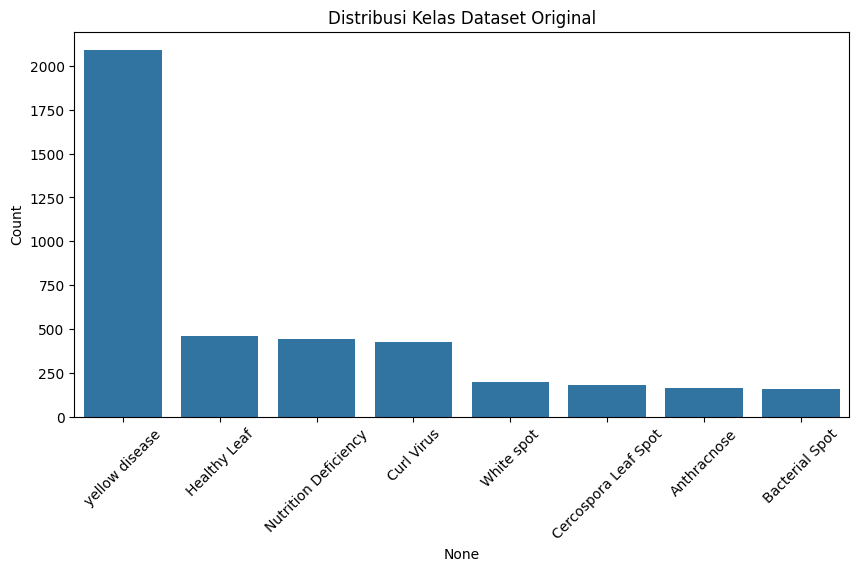

,Count
yellow disease,2091
Healthy Leaf,458
Nutrition Deficiency,444
Curl Virus,423
White spot,195
Cercospora Leaf Spot,180
Anthracnose,163
Bacterial Spot,156
Total,4110


In [ ]:
class_counts = {}

for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

df_classes = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])
df_classes = df_classes.sort_values(by='Count', ascending=False)
total_count = df_classes['Count'].sum()
df_classes.loc['Total'] = total_count

plt.figure(figsize=(10,5))
sns.barplot(x=df_classes.index[:-1], y=df_classes['Count'][:-1])
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Dataset Original")
plt.show()

df_classes

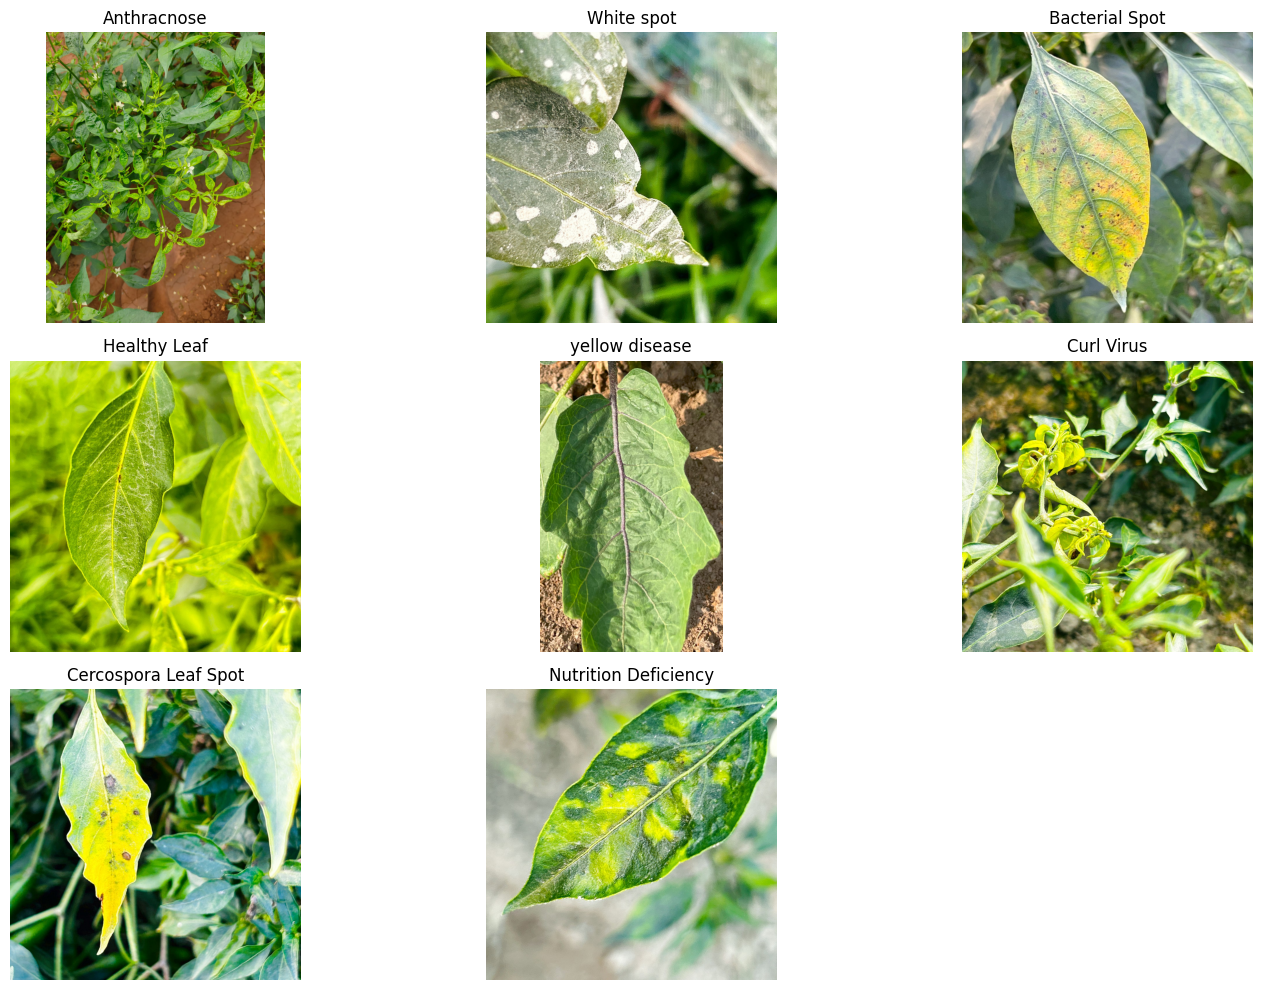

In [ ]:
plt.figure(figsize=(15,10))

i = 1
for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3,3,i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
    i += 1

plt.tight_layout()
plt.show()

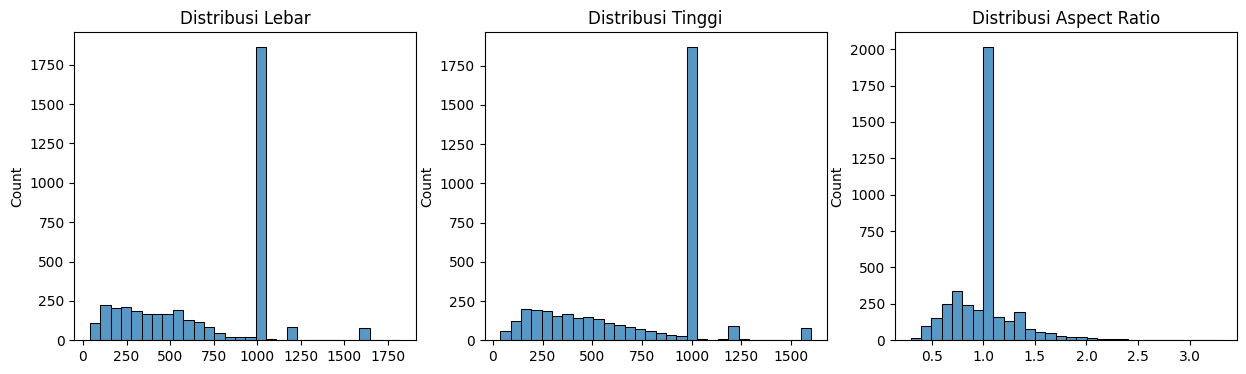

In [ ]:
widths = []
heights = []
ratios = []

for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        h, w, _ = img.shape

        heights.append(h)
        widths.append(w)
        ratios.append(w/h)

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(widths, bins=30)
plt.title("Distribusi Lebar")

plt.subplot(1,3,2)
sns.histplot(heights, bins=30)
plt.title("Distribusi Tinggi")

plt.subplot(1,3,3)
sns.histplot(ratios, bins=30)
plt.title("Distribusi Aspect Ratio")

plt.show()

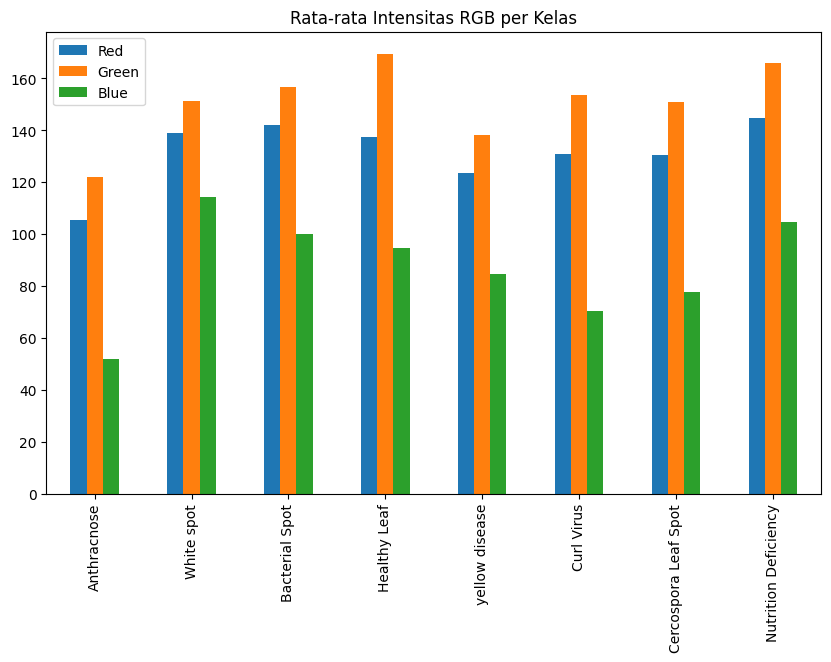

,Red,Green,Blue
Anthracnose,105.563503,122.124645,51.987881
White spot,138.916693,151.113351,114.381392
Bacterial Spot,141.881200,156.575680,100.191118
Healthy Leaf,137.560357,169.571217,94.492558
yellow disease,123.538225,138.269026,84.495938
Curl Virus,130.701870,153.576260,70.426531
Cercospora Leaf Spot,130.350641,151.063854,77.781677
Nutrition Deficiency,144.676078,166.099623,104.478156


In [ ]:
mean_colors = {}

for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)
    r_vals, g_vals, b_vals = [], [], []

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        r_vals.append(np.mean(img[:,:,0]))
        g_vals.append(np.mean(img[:,:,1]))
        b_vals.append(np.mean(img[:,:,2]))

    mean_colors[class_name] = [
        np.mean(r_vals),
        np.mean(g_vals),
        np.mean(b_vals)
    ]

df_colors = pd.DataFrame(mean_colors, index=["Red","Green","Blue"]).T

df_colors.plot(kind='bar', figsize=(10,6))
plt.title("Rata-rata Intensitas RGB per Kelas")
plt.show()

df_colors

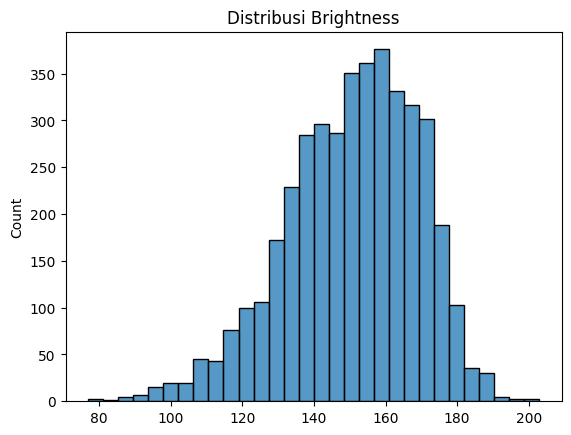

In [ ]:
brightness = []

for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        brightness.append(np.mean(hsv[:,:,2]))

sns.histplot(brightness, bins=30)
plt.title("Distribusi Brightness")
plt.show()

In [ ]:
import hashlib

hashes = set()
duplicates = 0
duplicate_image_paths = []

for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()

        if file_hash in hashes:
            duplicates += 1
            duplicate_image_paths.append(img_path)
        else:
            hashes.add(file_hash)

print("Jumlah duplikasi:", duplicates)
print("Citra yang duplikat:")
for path in duplicate_image_paths:
    print(path)

Jumlah duplikasi: 169
Citra yang duplikat:
/content/drive/MyDrive/Seminar Hasil/dataset_original/Anthracnose/IMG-20231104-WA0232.jpg
/content/drive/MyDrive/Seminar Hasil/dataset_original/Bacterial Spot/Bacterial Spot00149.JPG
/content/drive/MyDrive/Seminar Hasil/dataset_original/Bacterial Spot/Bacterial Spot00156.JPG
/content/drive/MyDrive/Seminar Hasil/dataset_original/Bacterial Spot/Bacterial Spot00151.JPG
/content/drive/MyDrive/Seminar Hasil/dataset_original/Bacterial Spot/Bacterial Spot00154.JPG
/content/drive/MyDrive/Seminar Hasil/dataset_original/yellow disease/Screenshot 2023-10-20 110442 - Copy.png
/content/drive/MyDrive/Seminar Hasil/dataset_original/yellow disease/Screenshot 2023-10-20 111004 - Copy.png
/content/drive/MyDrive/Seminar Hasil/dataset_original/yellow disease/Screenshot 2023-10-20 110749.png
/content/drive/MyDrive/Seminar Hasil/dataset_original/yellow disease/Screenshot 2023-10-20 110654.png
/content/drive/MyDrive/Seminar Hasil/dataset_original/yellow disease/Scre

# ANALISIS SEPARABILITAS FITUR

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

IMG_SIZE = 224
BATCH_SIZE = 32

dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = dataset.class_names

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    pooling='avg'
)

features = []
labels = []

for images, lbl in dataset:
    images = preprocess_input(images)
    feat = base_model.predict(images, verbose=0)
    features.append(feat)
    labels.extend(lbl.numpy())

features = np.vstack(features)
labels = np.array(labels)

Found 4110 files belonging to 8 classes.


/tmp/ipython-input-247560424.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


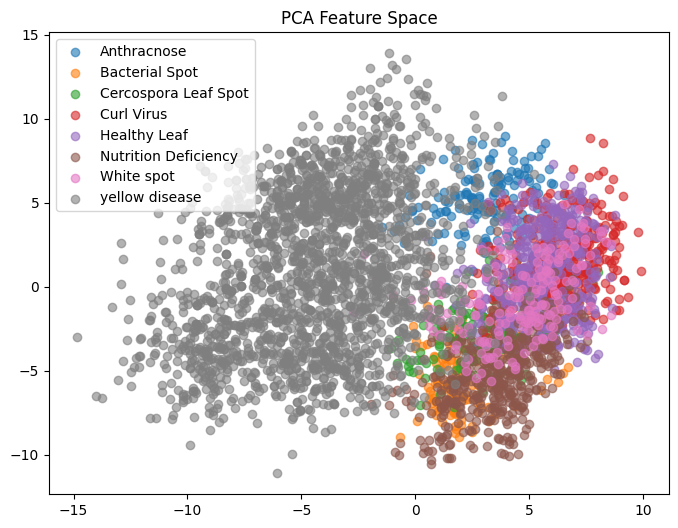

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

plt.figure(figsize=(8,6))

for i, class_name in enumerate(class_names):
    idx = labels == i
    plt.scatter(
        pca_result[idx,0],
        pca_result[idx,1],
        label=class_name,
        alpha=0.6
    )

plt.legend()
plt.title("PCA Feature Space")
plt.show()

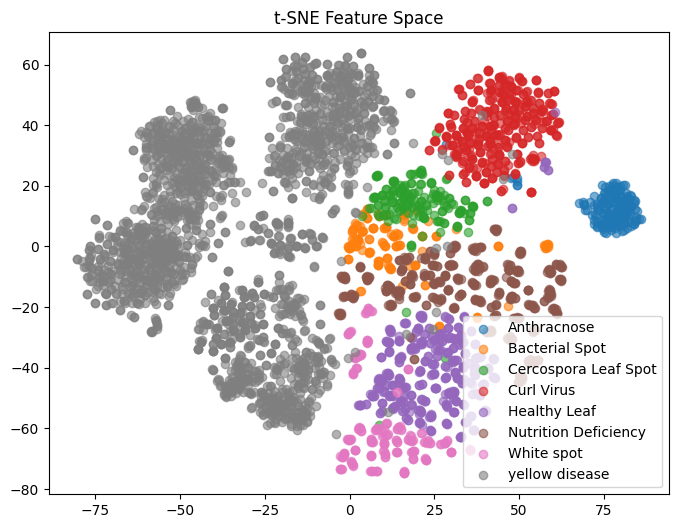

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(features)

plt.figure(figsize=(8,6))

for i, class_name in enumerate(class_names):
    idx = labels == i
    plt.scatter(
        tsne_result[idx,0],
        tsne_result[idx,1],
        label=class_name,
        alpha=0.6
    )

plt.legend()
plt.title("t-SNE Feature Space")
plt.show()